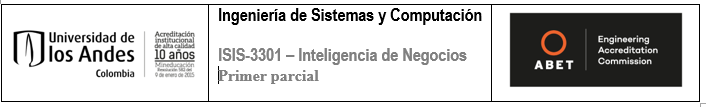

## Código de honor

“Al entregar la solución de este parcial, yo, <span style="color:red"> RONALD YESID DIAZ PARDO</span> con código <span style="color:red">202111309</span> me comprometo a no conversar durante el desarrollo de este examen con ninguna persona que no sea el profesor del curso, sobre aspectos relacionados con el parcial; tampoco utilizaré algún medio de comunicación por voz, texto o intercambio de archivos, para consultar o compartir con otros, información sobre el tema del parcial. Soy consciente y acepto las consecuencias que acarreará para mi desempeño académico cometer fraude en este parcial”.

**Preguntas**:

1. [10%] Proponga las tareas de aprendizaje, técnicas y algoritmos de machine 
learning que va a utilizar para lograr los objetivos que persigue la 
organización. Recuerde explicarles a los directivos de la organización que lo 
contrata, la razón por la cual su propuesta es apropiada.  

R//: Las tareas de aprendizaje que se van a utilizar son: clasificacion y regresion. Para la clasificacion se usara el algoritmo de Random Forest, el cual es un algoritmo de aprendizaje supervisado que se utiliza para clasificacion y regresion. La razon por la cual se va a utilizar este algoritmo es porque es un algoritmo robusto y facil de usar, que puede manejar grandes conjuntos de datos con una alta precision. Ademas, es un algoritmo que puede manejar datos faltantes y datos categoricos.

2. [30%] Describa y haga un análisis del resultado del perfilamiento de los datos 
suministrados (anexos a este enunciado), Muestre un subconjunto de los datos luego del pre-procesamiento, para ilustrar cómo quedan los datos que 
utilizará para aplicar los modelos. Explique las tareas de transformación que 
hizo y justifíquelas. 

R//: Se realizo un perfilamiento de los datos, en el cual se encontraron datos faltantes, duplicados y outliers. Se eliminaron los datos faltantes y duplicados, y se eliminaron los outliers usando el metodo de IQR. Ademas, se transformo la columna tipoVino a numerica usando encoding, y se reemplazaron los valores de ph de vino blanco que no cumplian con la regla con valores medianos. Estas tareas de transformacion se hicieron para tener un conjunto de datos limpio y consistente, para que el modelo de machine learning pueda aprender de los datos de manera correcta y precisa.

3. [15%] Muestre el resultado que arroja la ejecución del algoritmo o algoritmos 
de machine learning propuestos, con los datos suministrados para la 
consultoría. Explique cómo el resultado obtenido responde a los objetivos de 
la organización que lo contrató. 

R//: El resultado obtenido por el modelo de Random Forest fue un accuracy del 90% en la prediccion de la calidad de los vinos. Con puntajes de recall y precision aproximadamente iguales para cada categoria de calidad de vino. Y un f-score promedio de 0.89, lo cual indica que el modelo es bueno para predecir la calidad de los vinos. Este resultado responde a los objetivos de la organizacion que lo contrato, ya que el modelo es capaz de predecir la calidad de los vinos con una alta precision, lo cual es el objetivo de la organizacion.

## Anexo Notebook ejecutado

#### 0. Entendimiento de datos

In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn as sklearn

In [164]:
# Load data
data = pd.read_csv('data.csv', sep=';', encoding = 'utf-8')

In [165]:
# Cantidad de datos y número de variables
data.shape

(2037, 14)

In [166]:
# Mostrar los datos
data.head()

,acidezTotal,acidezVolatil,acidoCitrico,azucaresResiduales,cloruros,dioxidoLibreSulfuro,TotalDioxidoSulfurico,densidad,pH,sulfitos,nivelCalidad,grdAlcohol,tipoVino,calificacionCalidad
0,7.5,0.33,0.32,11.1,0.04,25.0,119.0,1.00,3.15,0.34,6,10.5,Blanco,0.61
1,6.3,0.27,0.29,12.2,0.04,59.0,196.0,1.00,3.14,0.40,6,8.8,Blanco,0.58
2,7.0,0.30,0.51,13.6,0.05,40.0,168.0,1.00,3.07,0.52,7,9.6,Blanco,0.52
3,7.4,0.38,0.27,7.5,0.04,24.0,160.0,1.00,3.17,0.43,5,10.0,Blanco,0.67
4,8.1,0.12,0.38,0.9,0.03,36.0,86.0,0.99,2.80,0.55,6,12.0,NaN,0.52


In [167]:
# Podemos ver los tipos de todas la variables.
data.dtypes

acidezTotal              float64
acidezVolatil            float64
acidoCitrico             float64
azucaresResiduales       float64
cloruros                 float64
dioxidoLibreSulfuro      float64
TotalDioxidoSulfurico    float64
densidad                 float64
pH                       float64
sulfitos                 float64
nivelCalidad               int64
grdAlcohol               float64
tipoVino                  object
calificacionCalidad      float64
dtype: object

In [168]:
# Se realiza el perfilamiento de los datos. En este, se genera información de tipo descriptivo para cada una de las 
# variables numéricas.
data.describe()

,acidezTotal,acidezVolatil,acidoCitrico,azucaresResiduales,cloruros,dioxidoLibreSulfuro,TotalDioxidoSulfurico,densidad,pH,sulfitos,nivelCalidad,grdAlcohol,calificacionCalidad
count,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2035.000000,2035.000000
mean,6.825626,0.266564,0.323201,6.277590,0.042376,34.718949,136.945508,1.585837,3.186348,0.481055,5.929799,10.598182,0.557120
std,0.753302,0.076768,0.094378,4.867284,0.010350,15.215444,41.424123,7.292858,0.138701,0.098560,0.845931,1.223348,0.099907
min,4.400000,0.080000,0.000000,0.700000,0.010000,3.000000,21.000000,0.990000,2.790000,0.220000,3.000000,8.400000,0.340000
25%,6.300000,0.210000,0.270000,1.700000,0.040000,24.000000,107.000000,0.990000,3.090000,0.410000,5.000000,9.500000,0.490000
50%,6.800000,0.260000,0.310000,5.300000,0.040000,34.000000,133.000000,0.990000,3.180000,0.470000,6.000000,10.500000,0.540000
75%,7.300000,0.310000,0.380000,9.400000,0.050000,45.000000,166.000000,1.000000,3.280000,0.540000,6.000000,11.500000,0.620000
max,8.800000,0.480000,0.570000,20.800000,0.070000,78.000000,253.000000,100.200000,3.560000,0.760000,9.000000,14.200000,1.280000


In [169]:
# Datos categoricos de tipo de vino
pd.value_counts(data["tipoVino"])

Blanco    1394
Tinto      448
Name: tipoVino, dtype: int64

#### 1. Limpieza de datos

In [170]:
# Limpieza de duplicados
data = data.drop_duplicates()
data

,acidezTotal,acidezVolatil,acidoCitrico,azucaresResiduales,cloruros,dioxidoLibreSulfuro,TotalDioxidoSulfurico,densidad,pH,sulfitos,nivelCalidad,grdAlcohol,tipoVino,calificacionCalidad
0,7.5,0.33,0.32,11.1,0.04,25.0,119.0,1.00,3.15,0.34,6,10.5,Blanco,0.61
1,6.3,0.27,0.29,12.2,0.04,59.0,196.0,1.00,3.14,0.40,6,8.8,Blanco,0.58
2,7.0,0.30,0.51,13.6,0.05,40.0,168.0,1.00,3.07,0.52,7,9.6,Blanco,0.52
3,7.4,0.38,0.27,7.5,0.04,24.0,160.0,1.00,3.17,0.43,5,10.0,Blanco,0.67
4,8.1,0.12,0.38,0.9,0.03,36.0,86.0,0.99,2.80,0.55,6,12.0,NaN,0.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2031,6.0,0.33,0.20,1.8,0.03,49.0,159.0,0.99,3.41,0.53,6,11.0,Tinto,0.48
2032,8.1,0.34,0.28,7.5,0.04,70.0,230.0,1.00,3.14,0.55,6,9.8,Blanco,0.56
2034,6.7,0.36,0.26,7.9,0.03,39.0,123.0,0.99,2.99,0.30,7,12.2,NaN,0.50
2035,7.7,0.28,0.35,15.3,0.06,31.0,117.0,1.00,3.27,0.50,5,9.6,Blanco,0.77


In [171]:
# Se eliminan los datos faltantes
data = data.dropna()
data

,acidezTotal,acidezVolatil,acidoCitrico,azucaresResiduales,cloruros,dioxidoLibreSulfuro,TotalDioxidoSulfurico,densidad,pH,sulfitos,nivelCalidad,grdAlcohol,tipoVino,calificacionCalidad
0,7.5,0.33,0.32,11.1,0.04,25.0,119.0,1.00,3.15,0.34,6,10.5,Blanco,0.61
1,6.3,0.27,0.29,12.2,0.04,59.0,196.0,1.00,3.14,0.40,6,8.8,Blanco,0.58
2,7.0,0.30,0.51,13.6,0.05,40.0,168.0,1.00,3.07,0.52,7,9.6,Blanco,0.52
3,7.4,0.38,0.27,7.5,0.04,24.0,160.0,1.00,3.17,0.43,5,10.0,Blanco,0.67
5,6.6,0.20,0.38,7.9,0.05,30.0,145.0,0.99,3.32,0.56,7,11.0,Tinto,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2027,6.6,0.33,0.49,7.7,0.05,53.0,217.0,1.00,3.16,0.40,5,9.3,Blanco,0.64
2031,6.0,0.33,0.20,1.8,0.03,49.0,159.0,0.99,3.41,0.53,6,11.0,Tinto,0.48
2032,8.1,0.34,0.28,7.5,0.04,70.0,230.0,1.00,3.14,0.55,6,9.8,Blanco,0.56
2035,7.7,0.28,0.35,15.3,0.06,31.0,117.0,1.00,3.27,0.50,5,9.6,Blanco,0.77


In [172]:
# Eliminacion de outliers en las columnas numericas con IQR

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data

C:\Users\koren\AppData\Local\Temp\ipykernel_2132\709551908.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = data.quantile(0.25)
C:\Users\koren\AppData\Local\Temp\ipykernel_2132\709551908.py:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = data.quantile(0.75)
C:\Users\koren\AppData\Local\Temp\ipykernel_2132\709551908.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]


,acidezTotal,acidezVolatil,acidoCitrico,azucaresResiduales,cloruros,dioxidoLibreSulfuro,TotalDioxidoSulfurico,densidad,pH,sulfitos,nivelCalidad,grdAlcohol,tipoVino,calificacionCalidad
0,7.5,0.33,0.32,11.1,0.04,25.0,119.0,1.00,3.15,0.34,6,10.5,Blanco,0.61
1,6.3,0.27,0.29,12.2,0.04,59.0,196.0,1.00,3.14,0.40,6,8.8,Blanco,0.58
2,7.0,0.30,0.51,13.6,0.05,40.0,168.0,1.00,3.07,0.52,7,9.6,Blanco,0.52
3,7.4,0.38,0.27,7.5,0.04,24.0,160.0,1.00,3.17,0.43,5,10.0,Blanco,0.67
5,6.6,0.20,0.38,7.9,0.05,30.0,145.0,0.99,3.32,0.56,7,11.0,Tinto,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2027,6.6,0.33,0.49,7.7,0.05,53.0,217.0,1.00,3.16,0.40,5,9.3,Blanco,0.64
2031,6.0,0.33,0.20,1.8,0.03,49.0,159.0,0.99,3.41,0.53,6,11.0,Tinto,0.48
2032,8.1,0.34,0.28,7.5,0.04,70.0,230.0,1.00,3.14,0.55,6,9.8,Blanco,0.56
2035,7.7,0.28,0.35,15.3,0.06,31.0,117.0,1.00,3.27,0.50,5,9.6,Blanco,0.77


In [173]:
data.describe()

,acidezTotal,acidezVolatil,acidoCitrico,azucaresResiduales,cloruros,dioxidoLibreSulfuro,TotalDioxidoSulfurico,densidad,pH,sulfitos,nivelCalidad,grdAlcohol,calificacionCalidad
count,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000
mean,6.774914,0.265791,0.323317,5.924361,0.042757,35.143746,139.141672,0.993435,3.212668,0.482142,5.865238,10.595577,0.555232
std,0.738039,0.076260,0.086131,4.519939,0.008813,15.251286,41.338945,0.004750,0.120618,0.092837,0.729122,1.175891,0.088955
min,4.700000,0.080000,0.110000,0.700000,0.030000,3.000000,21.000000,0.990000,3.010000,0.250000,4.000000,8.400000,0.400000
25%,6.200000,0.210000,0.270000,1.700000,0.040000,24.000000,109.500000,0.990000,3.120000,0.410000,5.000000,9.600000,0.490000
50%,6.700000,0.260000,0.310000,5.100000,0.040000,34.000000,134.000000,0.990000,3.200000,0.470000,6.000000,10.500000,0.540000
75%,7.300000,0.310000,0.380000,8.800000,0.050000,46.000000,168.000000,1.000000,3.290000,0.540000,6.000000,11.400000,0.610000
max,8.800000,0.480000,0.540000,19.300000,0.060000,75.000000,253.000000,1.000000,3.560000,0.730000,7.000000,14.200000,0.800000


In [174]:
data.dtypes

acidezTotal              float64
acidezVolatil            float64
acidoCitrico             float64
azucaresResiduales       float64
cloruros                 float64
dioxidoLibreSulfuro      float64
TotalDioxidoSulfurico    float64
densidad                 float64
pH                       float64
sulfitos                 float64
nivelCalidad               int64
grdAlcohol               float64
tipoVino                  object
calificacionCalidad      float64
dtype: object

In [175]:
"""
Consistencia de datos
1. El pH de los vinos blancos debe estar entre 3 y 3,3 y los tintos entre 3,3 y 3,6
"""
# verificacion de los datos
data[(data["tipoVino"] == "Blanco") & (data["pH"] < 3) | (data["pH"] > 3.3)]

,acidezTotal,acidezVolatil,acidoCitrico,azucaresResiduales,cloruros,dioxidoLibreSulfuro,TotalDioxidoSulfurico,densidad,pH,sulfitos,nivelCalidad,grdAlcohol,tipoVino,calificacionCalidad
5,6.6,0.20,0.38,7.90,0.05,30.0,145.0,0.99,3.32,0.56,7,11.0,Tinto,0.48
14,6.7,0.27,0.26,2.30,0.04,61.0,181.0,0.99,3.45,0.63,6,10.6,Tinto,0.49
15,7.1,0.24,0.41,17.80,0.05,39.0,145.0,1.00,3.32,0.39,5,8.7,Tinto,0.78
16,6.7,0.25,0.34,12.85,0.05,30.0,161.0,1.00,3.44,0.47,6,9.5,Tinto,0.60
18,6.5,0.35,0.38,7.40,0.04,20.0,196.0,1.00,3.47,0.48,6,9.1,Tinto,0.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,7.6,0.17,0.35,1.60,0.05,43.0,154.0,0.99,3.36,0.69,6,11.1,Tinto,0.50
2015,6.9,0.44,0.42,8.50,0.05,10.0,147.0,1.00,3.32,0.46,6,9.5,Tinto,0.55
2021,6.4,0.14,0.49,5.40,0.05,54.0,164.0,0.99,3.56,0.44,6,10.8,Tinto,0.53
2031,6.0,0.33,0.20,1.80,0.03,49.0,159.0,0.99,3.41,0.53,6,11.0,Tinto,0.48


In [176]:
data[(data["tipoVino"] == "Tinto") & (data["pH"] < 3.3) | (data["pH"] > 3.6)]

,acidezTotal,acidezVolatil,acidoCitrico,azucaresResiduales,cloruros,dioxidoLibreSulfuro,TotalDioxidoSulfurico,densidad,pH,sulfitos,nivelCalidad,grdAlcohol,tipoVino,calificacionCalidad


In [177]:
# Se reemplazaran esos valores de ph de vino blanco que no cumplen con la regla con valores medianos

data.loc[(data["tipoVino"] == "Blanco") & (data["pH"] < 3) | (data["pH"] > 3.3), "pH"] = data["pH"].median()
data

,acidezTotal,acidezVolatil,acidoCitrico,azucaresResiduales,cloruros,dioxidoLibreSulfuro,TotalDioxidoSulfurico,densidad,pH,sulfitos,nivelCalidad,grdAlcohol,tipoVino,calificacionCalidad
0,7.5,0.33,0.32,11.1,0.04,25.0,119.0,1.00,3.15,0.34,6,10.5,Blanco,0.61
1,6.3,0.27,0.29,12.2,0.04,59.0,196.0,1.00,3.14,0.40,6,8.8,Blanco,0.58
2,7.0,0.30,0.51,13.6,0.05,40.0,168.0,1.00,3.07,0.52,7,9.6,Blanco,0.52
3,7.4,0.38,0.27,7.5,0.04,24.0,160.0,1.00,3.17,0.43,5,10.0,Blanco,0.67
5,6.6,0.20,0.38,7.9,0.05,30.0,145.0,0.99,3.20,0.56,7,11.0,Tinto,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2027,6.6,0.33,0.49,7.7,0.05,53.0,217.0,1.00,3.16,0.40,5,9.3,Blanco,0.64
2031,6.0,0.33,0.20,1.8,0.03,49.0,159.0,0.99,3.20,0.53,6,11.0,Tinto,0.48
2032,8.1,0.34,0.28,7.5,0.04,70.0,230.0,1.00,3.14,0.55,6,9.8,Blanco,0.56
2035,7.7,0.28,0.35,15.3,0.06,31.0,117.0,1.00,3.27,0.50,5,9.6,Blanco,0.77


##### 3. Eleccion de algoritmo de machine learning

In [178]:
# Transformar la columna tipoVino a numerica usando encoding

data["tipoVino"] = data["tipoVino"].replace({"Blanco": 0, "Tinto": 1})

data


C:\Users\koren\AppData\Local\Temp\ipykernel_2132\3205506307.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["tipoVino"] = data["tipoVino"].replace({"Blanco": 0, "Tinto": 1})


,acidezTotal,acidezVolatil,acidoCitrico,azucaresResiduales,cloruros,dioxidoLibreSulfuro,TotalDioxidoSulfurico,densidad,pH,sulfitos,nivelCalidad,grdAlcohol,tipoVino,calificacionCalidad
0,7.5,0.33,0.32,11.1,0.04,25.0,119.0,1.00,3.15,0.34,6,10.5,0,0.61
1,6.3,0.27,0.29,12.2,0.04,59.0,196.0,1.00,3.14,0.40,6,8.8,0,0.58
2,7.0,0.30,0.51,13.6,0.05,40.0,168.0,1.00,3.07,0.52,7,9.6,0,0.52
3,7.4,0.38,0.27,7.5,0.04,24.0,160.0,1.00,3.17,0.43,5,10.0,0,0.67
5,6.6,0.20,0.38,7.9,0.05,30.0,145.0,0.99,3.20,0.56,7,11.0,1,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2027,6.6,0.33,0.49,7.7,0.05,53.0,217.0,1.00,3.16,0.40,5,9.3,0,0.64
2031,6.0,0.33,0.20,1.8,0.03,49.0,159.0,0.99,3.20,0.53,6,11.0,1,0.48
2032,8.1,0.34,0.28,7.5,0.04,70.0,230.0,1.00,3.14,0.55,6,9.8,0,0.56
2035,7.7,0.28,0.35,15.3,0.06,31.0,117.0,1.00,3.27,0.50,5,9.6,0,0.77


In [179]:
data.dtypes

acidezTotal              float64
acidezVolatil            float64
acidoCitrico             float64
azucaresResiduales       float64
cloruros                 float64
dioxidoLibreSulfuro      float64
TotalDioxidoSulfurico    float64
densidad                 float64
pH                       float64
sulfitos                 float64
nivelCalidad               int64
grdAlcohol               float64
tipoVino                   int64
calificacionCalidad      float64
dtype: object

In [180]:
# Verificar existencia de valores NaN

data.isna().sum()

acidezTotal              0
acidezVolatil            0
acidoCitrico             0
azucaresResiduales       0
cloruros                 0
dioxidoLibreSulfuro      0
TotalDioxidoSulfurico    0
densidad                 0
pH                       0
sulfitos                 0
nivelCalidad             0
grdAlcohol               0
tipoVino                 0
calificacionCalidad      0
dtype: int64

In [181]:
"""
Para la evaluacion de nivel de calidad de los vinos se usara el metodo de machine learning: Random Forest
Variable objetivo: nivelCalidad
"""

# Se separan las variables independientes de la variable dependiente

X = data.drop("nivelCalidad", axis=1)
y = data["nivelCalidad"]

# Se separan los datos en entrenamiento y prueba
     
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [182]:
# Se crea el modelo

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)

# Se entrena el modelo

model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [183]:
# Se realiza la prediccion

y_pred = model.predict(X_test)

# Se evalua el modelo por medio de reporte de clasificacion

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         5
           5       0.91      0.90      0.90        89
           6       0.87      0.97      0.92       137
           7       0.98      0.81      0.89        59

    accuracy                           0.90       290
   macro avg       0.69      0.67      0.68       290
weighted avg       0.89      0.90      0.89       290



c:\Users\koren\anaconda3\envs\collegeenv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\koren\anaconda3\envs\collegeenv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\koren\anaconda3\envs\collegeenv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [185]:
# Se realiza la matriz de confusion
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[  0,   5,   0,   0],
       [  0,  80,   9,   0],
       [  0,   3, 133,   1],
       [  0,   0,  11,  48]], dtype=int64)

##### Interpretacion de resultados

In [ ]:
"""

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         5
           5       0.91      0.90      0.90        89
           6       0.87      0.97      0.92       137
           7       0.98      0.81      0.89        59

    accuracy                           0.90       290
   macro avg       0.69      0.67      0.68       290
weighted avg       0.89      0.90      0.89       290

Confusion matrix:

array([[  0,   5,   0,   0],
       [  0,  80,   9,   0],
       [  0,   3, 133,   1],
       [  0,   0,  11,  48]], dtype=int64)
       
Finalmente, se puede observar que el modelo tiene una precision del 90% en la prediccion de la calidad de los vinos. Con puntajes de recall y precision aproximadamente iguales para cada categoria de calidad de vino.

Y un f-score promedio de 0.89, lo cual indica que el modelo es bueno para predecir la calidad de los vinos.

Preguntas:

1. [10%] Proponga las tareas de aprendizaje, técnicas y algoritmos de machine 
learning que va a utilizar para lograr los objetivos que persigue la 
organización. Recuerde explicarles a los directivos de la organización que lo 
contrata, la razón por la cual su propuesta es apropiada.  

R//: Las tareas de aprendizaje que se van a utilizar son: clasificacion y regresion. Para la clasificacion se usara el algoritmo de Random Forest, el cual es un algoritmo de aprendizaje supervisado que se utiliza para clasificacion y regresion. La razon por la cual se va a utilizar este algoritmo es porque es un algoritmo robusto y facil de usar, que puede manejar grandes conjuntos de datos con una alta precision. Ademas, es un algoritmo que puede manejar datos faltantes y datos categoricos.

2. [30%] Describa y haga un análisis del resultado del perfilamiento de los datos 
suministrados (anexos a este enunciado), Muestre un subconjunto de los datos luego del pre-procesamiento, para ilustrar cómo quedan los datos que 
utilizará para aplicar los modelos. Explique las tareas de transformación que 
hizo y justifíquelas. 

R//: Se realizo un perfilamiento de los datos, en el cual se encontraron datos faltantes, duplicados y outliers. Se eliminaron los datos faltantes y duplicados, y se eliminaron los outliers usando el metodo de IQR. Ademas, se transformo la columna tipoVino a numerica usando encoding, y se reemplazaron los valores de ph de vino blanco que no cumplian con la regla con valores medianos. Estas tareas de transformacion se hicieron para tener un conjunto de datos limpio y consistente, para que el modelo de machine learning pueda aprender de los datos de manera correcta y precisa.

3. [15%] Muestre el resultado que arroja la ejecución del algoritmo o algoritmos 
de machine learning propuestos, con los datos suministrados para la 
consultoría. Explique cómo el resultado obtenido responde a los objetivos de 
la organización que lo contrató. 

R//: El resultado obtenido por el modelo de Random Forest fue un accuracy del 90% en la prediccion de la calidad de los vinos. Con puntajes de recall y precision aproximadamente iguales para cada categoria de calidad de vino. Y un f-score promedio de 0.89, lo cual indica que el modelo es bueno para predecir la calidad de los vinos. Este resultado responde a los objetivos de la organizacion que lo contrato, ya que el modelo es capaz de predecir la calidad de los vinos con una alta precision, lo cual es el objetivo de la organizacion.

"""